# Assignment 1

## Imports

In [1]:
import numpy as np
import random
import math
import sys
from IPython.display import Latex

## Part 1 - Logistic Regression

I took a very modular approach to building my models. As you can see below I give the user an option to specify their own functions if they want to. I don't use it much in the first few models but will showcase it more for part 5.

I didn't really bother getting everything perfectly here, the model doesn't really check for convergence and just runs as long as it's told to.
Weights are a 1D array and bias is just a constant.

In [2]:
class LogisticReg():

    def __init__(self):
        self.input_size = None
        self.weights = None
        self.bias = None
        self.activation = None

    @staticmethod
    def weights_init(size):
        return np.random.uniform(-1/100, 1/100, size)

    @staticmethod
    def bias_init():
        return np.random.uniform(-1/100, 1/100, 1)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def logistic_loss(a, y):
        return - (y * math.log(a) + (1 - y) * math.log(1 - a))

    def train(self, data, labels, alpha=0.1, epochs=1,
              weights_init = None,
              biases_init = None,
              activation = None,
             ):

        if weights_init is None:
            weights_init = LogisticReg.weights_init

        if biases_init is None:
            biases_init = LogisticReg.bias_init

        if activation is None:
            self.activation = LogisticReg.sigmoid

        self.input_size = np.shape(data[0])[0]
        self.weights = weights_init(self.input_size)
        self.bias = biases_init()

        for _ in range(epochs):
            for dp, label in zip(data, labels):
                a = self.predict(dp)

                # Taken from notes
                dL_dw = (a - label) * dp
                dL_db = a - label

                self.weights -= alpha * dL_dw
                self.bias -= alpha * dL_db

    def predict(self, in_dp):
        z = np.sum(in_dp * self.weights) + self.bias
        return float(self.activation(z))

In [3]:
lr = LogisticReg()
lr.train(np.array([[1, 1, 1], [0, 0 ,0], [1, 1, 1], [1, 1, 1], [0, 0, 0]]), np.array([1, 0, 1, 1, 0]))

## Part 2 - LR Easy Tasks

### Imports

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

# Display plots inline and change default figure size
%matplotlib inline

In [5]:
## Based on the provided code

# Use pandas to read the CSV file as a dataframe
df_blobs = pd.read_csv("blobs300.csv")

# The y values are those labelled 'Class': extract their values
classes_blobs = df_blobs['Class'].values

# The x values are all other columns
del df_blobs['Class']   # drop the 'Class' column from the dataframe
data_blobs = df_blobs.values    # convert the remaining columns to a numpy array


# Use pandas to read the CSV file as a dataframe
df_circles = pd.read_csv("circles600.csv")

# The y values are those labelled 'Class': extract their values
classes_circles = df_circles['Class'].values

# The x values are all other columns
del df_circles['Class']     # drop the 'Class' column from the dataframe
data_circles = df_circles.values    # convert the remaining columns to a numpy array

### Shuffle and Split

Shuffles provided data, splits it according to the provided parameters and returns a dictionary with `["training]`, `["validation"]` and `["testing"]`.

In [6]:
def shuffle_and_split(data, labels, validation_split=0.7, test_split=0.15):
    # Below 3 lines based on https://play.pixelblaster.ro/blog/2017/01/20/how-to-shuffle-two-arrays-to-the-same-order/
    l = labels.shape[0]
    s = np.arange(l) # seed
    np.random.shuffle(s)
    #-----------

    data = np.array(data[s])
    labels = np.array(labels[s])

    validation_pivot = int(l * validation_split)
    testing_pivot = int(validation_pivot + l * test_split)

    data = {
        "training" : {
            "input": data[0 : validation_pivot],
            "classes": labels[0 : validation_pivot]
        },
        "validation" : {
            "input": data[validation_pivot : testing_pivot],
            "classes": labels[validation_pivot : testing_pivot],
        },
        "testing" : {
            "input": data[testing_pivot : l],
            "classes": labels[testing_pivot : l]
        },
    }

    return data

### Train - Blobs

In [7]:
data = dict()
data["blobs"] = shuffle_and_split(data_blobs, classes_blobs, validation_split=0.7, test_split=0.15)

lr_blob = LogisticReg()
lr_blob.train(data["blobs"]["training"]["input"], data["blobs"]["training"]["classes"], alpha = 0.03)

### Predict - Blobs

In [8]:
correct = 0
for dp, label in zip(data["blobs"]["validation"]["input"], data["blobs"]["validation"]["classes"]):
    a = lr_blob.predict(dp)

    if round(a) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['blobs']['validation']['classes']) }")

Accuracy = 0.9777777777777777


### Test - Blobs

In [9]:
correct = 0
for dp, label in zip(data["blobs"]["testing"]["input"], data["blobs"]["testing"]["classes"]):
    a = lr_blob.predict(dp)

    if round(a) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['blobs']['testing']['classes']) }")

Accuracy = 0.9555555555555556


As expected the results for linearly separable data are very good.

### Train - Circles

In [10]:
data["circles"] = shuffle_and_split(data_circles, classes_circles, validation_split=0.7, test_split=0.15)

lr_circles = LogisticReg()
lr_circles.train(data["circles"]["training"]["input"], data["circles"]["training"]["classes"], alpha=0.05)

### Predict - Circles

In [11]:
correct = 0
for dp, label in zip(data["circles"]["validation"]["input"], data["circles"]["validation"]["classes"]):
    a = lr_circles.predict(dp)

    if round(a) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['circles']['validation']['classes'])}")

Accuracy = 0.6222222222222222


### Testing - Circles

In [12]:
correct = 0
for dp, label in zip(data["circles"]["testing"]["input"], data["circles"]["testing"]["classes"]):
    a = lr_circles.predict(dp)

    if round(a) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['circles']['testing']['classes'])}")

Accuracy = 0.6777777777777778


Logistic regression is not a good fit for non-linearly separable data, hence the poor (random) result.

## Part 3 - Shallow Neural Network

In [13]:
class ShallowNetwork:
    epsilon = sys.float_info.epsilon

    def __init__(self):
        self.input_size = None
        self.weights = None
        self.biases = None
        self.activation = None
        self.activation_derivative = None
        self.loss_function = None
        self.normalizer = None

    @staticmethod
    def weights_init(size):
        return np.random.normal(0, 0.2, size)
        # Based on  xavier initialization
        # https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
        # n = 1
        # if len(size) > 1:
        #     n = size[1]
        # return np.random.uniform(-1/math.sqrt(n), 1/math.sqrt(n), size)

    @staticmethod
    def biases_init(size):
        return np.random.normal(0, 0.2, size)

    # Because of overflow
    # as explained here
    # https://shaktiwadekar.medium.com/how-to-avoid-numerical-overflow-in-sigmoid-function-numerically-stable-sigmoid-function-5298b14720f6
    @staticmethod
    def sigmoid(x):
        return np.where( x >= 0, (1 / (1 + np.exp(-x))), (np.exp(x) / (1 + np.exp(x))) )

    @staticmethod
    def sigmoid_derivative(x):
        return ShallowNetwork.sigmoid(x) * (1 - ShallowNetwork.sigmoid(x))

    @staticmethod
    def logistic_loss(a, y):
        return - (y * math.log(a + ShallowNetwork.epsilon) + (1 - y) * math.log(1 - a + ShallowNetwork.epsilon))

    # Proper transpose, not this numpy BS
    @staticmethod
    def transpose(x):
        if len(np.shape(x)) == 1:
            return x.reshape(1, -1)
        return np.transpose(x)

    # Based on https://en.wikipedia.org/wiki/Feature_scaling
    @staticmethod
    def normalize(x, x_min, x_max, new_min=-1, new_max=1):
        return ((x - x_min) / (x_max - x_min)) * (new_max - new_min) + new_min

    @staticmethod
    def normalizer_constructor(data, normalize):
        t_data = ShallowNetwork.transpose(data)
        x_min = []
        x_max = []
        for d_vector in t_data:
            x_min.append(min(d_vector))
            x_max.append(max(d_vector))

        return lambda x: np.array([normalize(xx, x_min[idx], x_max[idx]) for idx, xx in enumerate(x)])

    def train(self, data, labels, k=10, alpha=0.5, stop_early=False, stop_avg_loss=0.01, n_loss_avg = 10,
              iterations=None,
              weights_init = None,
              biases_init = None,
              activation = None,
              activation_derivative = None,
              loss_function = None,
              normalize = None
             ):

        if iterations is None:
            iterations = len(data)

        if weights_init is None:
            weights_init = ShallowNetwork.weights_init

        if biases_init is None:
            biases_init = ShallowNetwork.biases_init

        if activation is None:
            activation = ShallowNetwork.sigmoid

        if activation_derivative is None:
            activation_derivative = ShallowNetwork.sigmoid_derivative

        if loss_function is None:
            loss_function = ShallowNetwork.logistic_loss

        if normalize is None:
            normalize = ShallowNetwork.normalize

        self.input_size = np.shape(data[0])[0]
        self.weights = [weights_init((k, self.input_size)), weights_init((1, k))]
        self.biases = [biases_init(k), biases_init(1)]
        self.activation = np.vectorize(activation)
        self.activation_derivative = np.vectorize(activation_derivative)
        self.loss_function = np.vectorize(loss_function)
        alpha = float(alpha)
        self.normalizer = ShallowNetwork.normalizer_constructor(data, normalize)

        losses = []
        for iter in range(iterations):
            [dp, label] = random.choice(list((zip(data, labels))))

            a, z = self.f_propagate(dp)
            if stop_early:
                loss = self.loss_function(a[-1], label)[0]
                if len(losses) == n_loss_avg:
                    avg_loss = sum(losses) / len(losses)
                    if avg_loss < stop_avg_loss:
                        print(f"Stopped after {iter} iterations")
                        break
                losses.append(loss)
                losses = losses[-n_loss_avg:]

            # Based on my old assignment https://github.com/jaroslawjanas/NN-Perceptron
            # (math is included in the repo https://github.com/jaroslawjanas/NN-Perceptron/tree/master/maths) which
            # is based on this playlist of videos https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
            # and partially based on https://sudeepraja.github.io/Neural/

            # Output Layer
            dL_dz = a[-1] - label
            dz_dw = a[-2]  # previous layer
            dz_db = 1
            dz_da_m1 = self.weights[-1]


            dL_dw = dL_dz.dot(ShallowNetwork.transpose(dz_dw))
            dL_db = dL_dz * dz_db
            dL_da_m1 = ShallowNetwork.transpose(dz_da_m1).dot(dL_dz) # this line is based on https://sudeepraja.github.io/Neural/

            self.weights[-1] -= alpha * dL_dw
            self.biases[-1] -= alpha * dL_db

            # Hidden Layer
            da_m1_dz_m1 = activation_derivative(z[-2])
            dL_dz_m1 = dL_da_m1 * da_m1_dz_m1
            dz_m1_dw_m1 = a[-3]
            dz_m1_db_m1 = 1

            dL_dw_m1 = dL_dz_m1[:,np.newaxis].dot(ShallowNetwork.transpose(dz_m1_dw_m1))
            # above line is based on https://sudeepraja.github.io/Neural/
            dL_db_m1 = dL_dz_m1 * dz_m1_db_m1

            self.weights[-2] -= alpha * dL_dw_m1
            self.biases[-2] -= alpha * dL_db_m1

    def f_propagate(self, in_dp):
        norm_in_dp = self.normalizer(in_dp)
        a = [norm_in_dp]
        zz = []
        for weights, biases in zip(self.weights, self.biases):

            z = np.dot(weights, a[-1]) + biases
            zz = zz + [z]
            a = a + [self.activation(z)]

        return a, zz

    def predict(self, in_dp):
        a, _ = self.f_propagate(in_dp)
        return a[-1]

### Blobs

In [14]:
snn_blobs = ShallowNetwork()
snn_blobs.train(data["blobs"]["training"]["input"], data["blobs"]["training"]["classes"],
                k=3 , alpha=0.5, iterations=50_000,
                stop_early=True, stop_avg_loss=0.01, n_loss_avg=5)

Stopped after 421 iterations


In [15]:
correct = 0
for dp, label in zip(data["blobs"]["testing"]["input"], data["blobs"]["testing"]["classes"]):
    a = snn_blobs.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['blobs']['testing']['classes'])}")

Accuracy = 1.0


In [16]:
correct = 0
for dp, label in zip(data["blobs"]["validation"]["input"], data["blobs"]["validation"]["classes"]):
    a = snn_blobs.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['blobs']['validation']['classes'])}")

Accuracy = 1.0


### Circles

In [17]:
snn_circles = ShallowNetwork()
snn_circles.train(data["circles"]["training"]["input"], data["circles"]["training"]["classes"],
                  k=3, alpha = 0.1, iterations = 50_000,
                  stop_early=True, stop_avg_loss=0.005, n_loss_avg=5)

Stopped after 38475 iterations


In [18]:
correct = 0
for dp, label in zip(data["circles"]["testing"]["input"], data["circles"]["testing"]["classes"]):
    a = snn_circles.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['circles']['testing']['classes'])}")

Accuracy = 1.0


In [19]:
correct = 0
for dp, label in zip(data["circles"]["validation"]["input"], data["circles"]["validation"]["classes"]):
    a = snn_circles.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['circles']['validation']['classes'])}")

Accuracy = 1.0


In [20]:
acc = 0
for i in range(10):
    snn_circles = ShallowNetwork()
    snn_circles.train(data["circles"]["training"]["input"], data["circles"]["training"]["classes"],
                  k=3, alpha = 0.1, iterations = 50_000,
                  stop_early=True, stop_avg_loss=0.005, n_loss_avg=5)

    correct = 0
    for dp, label in zip(data["circles"]["testing"]["input"], data["circles"]["testing"]["classes"]):
        a = snn_circles.predict(dp)

        if round(a[0]) == label:
            correct += 1

    acc += round(correct / len(data['circles']['testing']['classes']), 2)

print(f"Avg accuracy {acc/10}")

Stopped after 26599 iterations
Stopped after 37494 iterations
Stopped after 43035 iterations
Stopped after 39425 iterations
Stopped after 28735 iterations
Stopped after 48262 iterations
Stopped after 31017 iterations
Stopped after 26566 iterations
Stopped after 26189 iterations
Avg accuracy 0.891


## Part 4 - Difficult Task 

In [21]:
# Literally just copied from the provided example

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def loadbatch(batchname):
    folder = 'cifar-10-batches-py'
    batch = unpickle(folder+"/"+batchname)
    return batch

def loadlabelnames():
    folder = 'cifar-10-batches-py'
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

import matplotlib.pyplot as plt

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32)

    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

Loading a batch

In [22]:
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())

Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


Separating the data into classes and showing sample images

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)
Horse idx shape: (1001,)
Truck data shape: (1001, 3, 32, 32)
Truck idx shape: (981,)
Truck data shape: (981, 3, 32, 32)


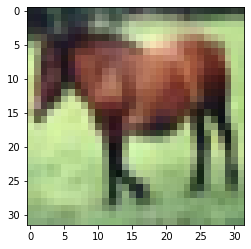

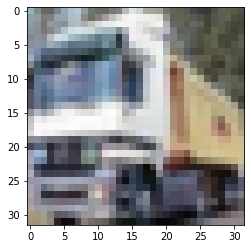

In [23]:
cf_data = batch1[b'data']
cf_labels = batch1[b'labels']

print ("size of data in this batch:", len(cf_data), ", size of labels:", len(cf_labels))
print (type(cf_data))
print(cf_data.shape)

# names = loadlabelnames()
# print(names)

# My modifications
horse_idxs = np.where(np.array(cf_labels) == 7)[0]
horse_data = np.array(cf_data[horse_idxs])
horse_data.shape = (len(horse_idxs), 3,32,32)
print(f"Horse idx shape: {np.shape(horse_idxs)}")
print(f"Truck data shape: {np.shape(horse_data)}")

truck_idxs = np.where(np.array(cf_labels) ==9)[0]
truck_data = np.array(cf_data[truck_idxs])
truck_data.shape = (len(truck_idxs), 3,32,32)

print(f"Truck idx shape: {np.shape(truck_idxs)}")
print(f"Truck data shape: {np.shape(truck_data)}")

picture = horse_data[0]
# picture.shape = (3,32,32)

picture = picture.transpose([1, 2, 0])
plt.imshow(picture)
plt.show()

picture = truck_data[0]
# picture.shape = (3,32,32)

picture = picture.transpose([1, 2, 0])
plt.imshow(picture)
plt.show()

Joining the two classes into a single dataset

In [24]:
horse_truck_data = np.array(horse_data)
print(f"H&T = {np.shape(horse_truck_data)}")

print(f"+     {np.shape(truck_data)}")

horse_truck_data = np.append(horse_truck_data, truck_data, axis=0)
print(f"H&T = {np.shape(horse_truck_data)}\n")

horse_truck_classes = np.array(np.zeros(len(horse_data)))
print(f"H&T_c = {np.shape(horse_truck_classes)}")

print(f"+       {np.shape(np.zeros(len(truck_data)))}")
horse_truck_classes = np.append(horse_truck_classes, np.ones(len(truck_data)))
print(f"H&T_c = {np.shape(horse_truck_classes)}")

H&T = (1001, 3, 32, 32)
+     (981, 3, 32, 32)
H&T = (1982, 3, 32, 32)

H&T_c = (1001,)
+       (981,)
H&T_c = (1982,)


Converting the RGB images to grayscale and showing examples.

(1982, 32, 32)


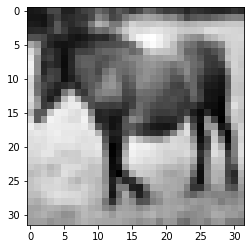

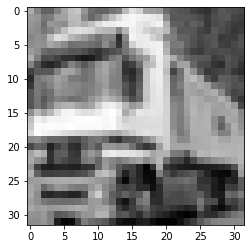

In [25]:
horse_truck_data_grayscale = np.sum(horse_truck_data, axis=1) / 3
print(np.shape(horse_truck_data_grayscale))

plt.imshow(horse_truck_data_grayscale[0], cmap='gray')
plt.show()

plt.imshow(horse_truck_data_grayscale[1001], cmap='gray')
plt.show()

In [26]:
horse_truck_data_grayscale.shape = (len(horse_truck_data_grayscale), 1024)
np.shape(horse_truck_data_grayscale)

(1982, 1024)

Splitting the data into `["training"]`, `["validation"]` and `["testing"]`.

In [27]:
data["horse_truck"] = shuffle_and_split(horse_truck_data_grayscale, horse_truck_classes, validation_split=0.7, test_split=0.15)

Training a shallow net on the `horse_truck` data.

In [28]:
snn_horse_truck = ShallowNetwork()
snn_horse_truck.train(data["horse_truck"]["training"]["input"], data["horse_truck"]["training"]["classes"],
                  k=20, alpha=0.1, iterations=30_000,
                  stop_early=True, stop_avg_loss=0.01, n_loss_avg=5)

Stopped after 5421 iterations


Testing the shallow net.

In [29]:
correct = 0
for dp, label in zip(data["horse_truck"]["testing"]["input"], data["horse_truck"]["testing"]["classes"]):
    a = snn_horse_truck.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['horse_truck']['testing']['classes'])}")

Accuracy = 0.7583892617449665


In [30]:
correct = 0
for dp, label in zip(data["horse_truck"]["validation"]["input"], data["horse_truck"]["validation"]["classes"]):
    a = snn_horse_truck.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['horse_truck']['validation']['classes'])}")

Accuracy = 0.7609427609427609


It performs very well. Even better than the deep neural network without any improvements.

## Part 5 - Mathematics

Self made image from my old assignment [github](https://github.com/jaroslawjanas/NN-Perceptron/tree/master/maths)
which was based on [3blue1brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) neural networks playlist
![DNN Tree](https://i.imgur.com/euAGKgQ.png)

\begin{array}
\\
\text{-------- Functions --------}
\\
C_{0} = - (y \ln (a) + (1-y) \ln (1-a))
\\
a^{(L)} = \sigma (z^{(L)})
\\
z^{(L)} = w^{(L)} a^{(L-1)} + b
\\
\sigma(z) = \frac{1}{1 + e^{-x}}
\end{array}

\begin{array}
\\
\text{-------- Derivatives of Functions --------}
\\
\frac{\partial C_{0}}{\partial a^{(L)}} = \frac{a - y}{a(1-a)}
\\
\frac{\partial a^{(L)}}{\partial z^{(L)}} = \sigma \prime (z^{(L)})
\\
\sigma \prime = \frac{e^{-z}}{(1 + e^{-z})^{2}}
\\
\frac{\partial C_{0}}{\partial z^{(L)}} = \frac{\partial C_{0}}{\partial a^{(L)}} \frac{\partial a^{(L)}}{\partial z^{(L)}}
\\
\frac{\partial C_{0}}{\partial z^{(L)}} = a^{(L)} - y
\\
\frac{\partial z^{(L)}}{\partial w^{(L)}} = a^{(L-1)}
\\
\frac{\partial z^{(L)}}{\partial a^{(L-1)}} = w^{(L)}
\\
\frac{\partial z^{(L)}}{\partial b^{(L)}} = 1
\\
\sigma(z) = \frac{1}{1 + e^{-x}}
\end{array}

\begin{array}
\\
\text{-------- Output Layer --------}\\
\\
\frac{\partial C_{0}}{\partial w^{(L)}} =\ \frac{\partial C_{0}}{\partial a^{(L)}} \ \frac{\partial a^{(L)}}{\partial z^{(L)}} \ \frac{\partial z^{(L)}}{\partial w^{(L)}}\\
\\
\frac{\partial C_{0}}{\partial b^{(L)}} \ =\frac{\partial C_{0}}{\partial a^{(L)}} \ \frac{\partial a^{(L)}}{\partial z^{(L)}} \ \frac{\partial z^{(L)}}{\partial b^{(L)}}\\
\\
\frac{\partial C_{0}}{\partial a^{(L-1)}} =\frac{\partial C_{0}}{\partial a^{(L)}} \ \frac{\partial a^{(L)}}{\partial z^{(L)}} \ \frac{\partial z^{(L)}}{\partial a^{(L-1)}}\\
\\
\text{Note the common element}\\
\\
\frac{\partial C_{0}}{\partial z^{(L)}} \ =\frac{\partial C_{0}}{\partial a^{(L)}} \ \frac{\partial a^{(L)}}{\partial z^{(L)}}\\
\\
\text{Hence}\\
\\
\frac{\partial C_{0}}{\partial w^{(L)}} =\ \frac{\partial C_{0}}{\partial z^{(L)}} \ \frac{\partial z^{(L)}}{\partial w^{(L)}}\\
\\
\frac{\partial C_{0}}{\partial b^{(L)}} \ =\frac{\partial C_{0}}{\partial z^{(L)}} \ \frac{\partial z^{(L)}}{\partial b^{(L)}}\\
\\
\frac{\partial C_{0}}{\partial a^{(L-1)}} =\frac{\partial C_{0}}{\partial z^{(L)}} \ \frac{\partial z^{(L)}}{\partial a^{(L-1)}}\\
\\
\text{Substituting for derivatives from "Derivatives of Functions"}\\
\\
\frac{\partial C_{0}}{\partial z^{(L)}} = a^{(L)} - y
\\
\frac{\partial C_{0}}{\partial w^{(L)}} \ =\ \frac{\partial C_{0}}{\partial z^{(L)}} \ a^{(L-1)}\\
\\
\frac{\partial C_{0}}{\partial b^{(L)}} =\frac{\partial C_{0}}{\partial z^{(L)}} \ 1\\
\\
\frac{\partial C_{0}}{\partial a^{(L-1)}} =\frac{\partial C_{0}}{\partial z^{(L)}} \ w^{(L)}\\
\\
\end{array}

\begin{array}
\\
\text{-------- Hidden Layers --------}\\
\\
\frac{\partial C_{0}}{\partial w^{(L-1)}} =\ \frac{\partial C_{0}}{\partial a^{(L-1)}} \ \frac{\partial a^{(L-1)}}{\partial z^{(L-1)}} \ \frac{\partial z^{(L-1)}}{\partial w^{(L-1)}}\\
\\
\frac{\partial C_{0}}{\partial b^{(L-1)}} =\ \frac{\partial C_{0}}{\partial a^{(L-1)}} \ \frac{\partial a^{(L-1)}}{\partial z^{(L-1)}} \ \frac{\partial z^{(L-1)}}{\partial b^{(L-1)}}\\
\\
\frac{\partial C_{0}}{\partial w^{(L-2)}} =\ \frac{\partial C_{0}}{\partial a^{(L-1)}} \ \frac{\partial a^{(L-1)}}{\partial z^{(L-1)}} \ \frac{\partial z^{(L-1)}}{\partial w^{(L-2)}}\\
\\
\text{Note the common element}\\
\\
\frac{\partial C_{0}}{\partial z^{(L-1)}} =\frac{\partial C_{0}}{\partial a^{(L-1)}} \ \frac{\partial a^{(L-1)}}{\partial z^{(L-1)}}\\
\\
\text{Hence}\\
\\
\frac{\partial C_{0}}{\partial w^{(L-1)}} =\ \frac{\partial C_{0}}{\partial z^{(L-1)}} \ \frac{\partial z^{(L-1)}}{\partial w^{(L-1)}}\\
\\
\frac{\partial C_{0}}{\partial b^{(L-1)}} =\ \frac{\partial C_{0}}{\partial z^{(L-1)}} \ \frac{\partial z^{(L-1)}}{\partial b^{(L-1)}}\\
\\
\frac{\partial C_{0}}{\partial w^{(L-2)}} =\ \frac{\partial C_{0}}{\partial z^{(L-1)}} \ \frac{\partial z^{(L-1)}}{\partial w^{(L-2)}}\\
\\
\text{Substituting for derivatives from "Derivatives of Functions"}\\
\\
\frac{\partial C_{0}}{\partial z^{(L-1)}} =\ \frac{\partial C_{0}}{\partial a^{(L-1)}} \ \sigma \prime (z^{(L-1)})\\
\\
\frac{\partial C_{0}}{\partial w^{(L-1)}} =\ \frac{\partial C_{0}}{\partial z^{(L-1)}} \ a^{(L-2)}\\
\\
\frac{\partial C_{0}}{\partial b^{(L-1)}} =\ \frac{\partial C_{0}}{\partial z^{(L-1)}} \ 1\\
\\
\frac{\partial C_{0}}{\partial w^{(L-2)}} =\ \frac{\partial C_{0}}{\partial z^{(L-1)}} \ w^{(L-1)}\\
\end{array}

## Part 5 - Deep Neural Network

I tried to make my DNN fairly modular. That's why some functions can be passed as inputs.
I had to derive `dL/da` (the loss with respect to activation) myself in order to allow for custom activation function in the output layer.
I am not including the mathematics behind `dL/da` of the loss function because it's long.

Additionally, some transposes used in the back-propagation were taken from [here](https://sudeepraja.github.io/Neural/).

I had some problems with sigmoid `np.exp(-x)` causing overflow so I separated it into two functions as recommended [here](https://shaktiwadekar.medium.com/how-to-avoid-numerical-overflow-in-sigmoid-function-numerically-stable-sigmoid-function-5298b14720f6). Vectorizing it was quite difficult.
Ah yes, and I did vectorize forward propagation.

Note that normalize operates with respect to particular input, different normalizer will be created for `x` and `y` in `[[x0, y0], [x1, y1], [x2, y2]]`.

Also at this point I also decided to implement early stopping which I later also put in the ShallowNetwork implementation.

In [31]:
class DeepNetwork:
    epsilon = sys.float_info.epsilon

    def __init__(self):
        self.input_size = []
        self.k = []
        self.weights = []
        self.biases = []
        self.activation = []
        self.activation_derivative = []
        self.loss_function = None
        self.normalizer = None


    @staticmethod
    def weights_init(size):
        # Based on xavier initialization
        # https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
        # n = 1
        # if len(size) > 1:
        #     n = size[1]
        # return np.random.uniform(-1/math.sqrt(n), 1/math.sqrt(n), size)
        return np.random.normal(0, 0.2, size)

    @staticmethod
    def biases_init(size):
        return np.random.normal(0, 0.2, size)

    # Because of overflow
    # as explained here
    # https://shaktiwadekar.medium.com/how-to-avoid-numerical-overflow-in-sigmoid-function-numerically-stable-sigmoid-function-5298b14720f6
    @staticmethod
    def sigmoid(x):
        return np.where(x >= 0, (1 / (1 + np.exp(-x))), (np.exp(x) / (1 + np.exp(x))) )
         # return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return DeepNetwork.sigmoid(x) * (1 - DeepNetwork.sigmoid(x))

    @staticmethod
    def relu(x):
        return max(0, x)

    # Taken from https://stackoverflow.com/questions/46411180/implement-relu-derivative-in-python-numpy
    @staticmethod
    def relu_derivative(x):
        return (x > 0) * 1

    @staticmethod
    def logistic_loss(a, y):
        return - (y * math.log(a + DeepNetwork.epsilon) + (1 - y) * math.log(1 - a + DeepNetwork.epsilon))

    # Proper transpose, not this numpy BS
    @staticmethod
    def transpose(x):
        if len(np.shape(x)) == 1:
            return x.reshape(1, -1)
        return np.transpose(x)

    @staticmethod
    def one_d_always_two_d(x):
        if len(np.shape(x)) == 1:
            return x[:, np.newaxis]
        else:
            return x

    # Based on https://en.wikipedia.org/wiki/Feature_scaling
    @staticmethod
    def normalize(x, x_min, x_max, new_min=-1, new_max=1):
        return ((x - x_min) / (x_max - x_min)) * (new_max - new_min) + new_min

    @staticmethod
    def normalizer_constructor (data, normalize):
        t_data = DeepNetwork.transpose(data)
        x_min = []
        x_max = []
        for d_vector in t_data:
            x_min.append(min(d_vector))
            x_max.append(max(d_vector))

        return lambda x: np.array([normalize(xx, x_min[idx], x_max[idx]) for idx, xx in enumerate(x)])


    def add_layer(self, k, weights_init = None,
                 biases_init = None,
                 activation = None,
                 activation_derivative = None,
                 input_size = None
                 ):

        if weights_init is None:
            weights_init = DeepNetwork.weights_init

        if biases_init is None:
            biases_init = DeepNetwork.biases_init

        if activation is None:
            activation = DeepNetwork.sigmoid

        if activation_derivative is None:
            activation_derivative = DeepNetwork.sigmoid_derivative

        if len(self.input_size) == 0 and input_size is None:
            raise Exception("You are creating an input layer and did not provide input size")
        elif len(self.k) > 0:
            input_size = self.k[-1]

        self.k.append(k)
        self.input_size.append(input_size)
        self.weights.append(weights_init((k, input_size)))
        self.biases.append(biases_init((k,)))
        self.activation.append(np.vectorize(activation))
        self.activation_derivative.append(np.vectorize(activation_derivative))

    def train(self, data, labels, alpha=0.01, stop_early=False, stop_avg_loss=0.01, n_loss_avg=10,
              iterations=None,
              loss_function=None,
              normalize=None
              ):

        if iterations is None:
            iterations = len(data)

        if loss_function is None:
            loss_function = DeepNetwork.logistic_loss

        if normalize is None:
            normalize = DeepNetwork.normalize

        self.loss_function = np.vectorize(loss_function)
        alpha = float(alpha)
        self.normalizer = DeepNetwork.normalizer_constructor(data, normalize)

        losses = []
        for iter in range(iterations):
            [dp, label] = random.choice(list((zip(data, labels))))

            a, z = self.f_propagate(dp)
            if stop_early:
                loss = self.loss_function(a[-1], label)[0]
                if len(losses) == n_loss_avg:
                    avg_loss = sum(losses) / len(losses)
                    if avg_loss < stop_avg_loss:
                        print(f"Stopped after {iter} iterations")
                        break
                losses.append(loss)
                losses = losses[-n_loss_avg:]

            # Based on my old assignment https://github.com/jaroslawjanas/NN-Perceptron
            # (math is included in the repo https://github.com/jaroslawjanas/NN-Perceptron/tree/master/maths) which
            # is based on this playlist of videos https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
            # and partially based on https://sudeepraja.github.io/Neural/

            # I also finally bothered to do the derivatives

            # Was going to build a loop for this but I have to build one for part 5 anyway
            # So I am not going to bother

            dL_da_mn = None
            for i in range(1, len(self.k)):

                if(i == 1):
                    # Output layer

                    # dL_dz = a[-i] - label  # <-- This is faster because it's mathematically simplified
                    # dL_da = (a[-i] - label) / ((a[-i] * (1 - a[-i])) + DeepNetwork.epsilon) # this is ugly

                    # this avoids division by 0
                    if (a[-i] * (1 - a[-i])) == 0:
                        dL_da = (a[-i] - label) / DeepNetwork.epsilon
                    else:
                        dL_da = (a[-i] - label) / (a[-i] * (1 - a[-i]))

                    da_dz = self.activation_derivative[-i](z[-i])
                    dL_dz = dL_da *  da_dz # <-- but this is more flexible, I can specify my own activation for output layer
                    dz_dw = a[-(i+1)]  # previous layer
                    dz_db = 1
                    dz_da_m1 = self.weights[-i]


                    dL_dw = dL_dz.dot(DeepNetwork.transpose(dz_dw))
                    dL_db = dL_dz * dz_db
                    dL_da_mn = DeepNetwork.transpose(dz_da_m1).dot(dL_dz) # this line is based on https://sudeepraja.github.io/Neural/

                    self.weights[-i] -= alpha * dL_dw
                    self.biases[-i] -= alpha * dL_db

                else:
                    # Hidden Layers

                    da_m1_dz_m1 = self.activation_derivative[-i](z[-i])
                    dL_dz_m1 = dL_da_mn * da_m1_dz_m1
                    dz_m1_dw_m1 = a[-(i+1)]
                    dz_m1_db_m1 = 1
                    if i is not len(self.k):
                        dz_m1_da_m2 = self.weights[-i]

                    # dL_dw_m1 = dL_dz_m1[:,np.newaxis].dot(DeepNetwork.transpose(dz_m1_dw_m1))
                    dL_dw_m1 = DeepNetwork.one_d_always_two_d(dL_dz_m1).dot(DeepNetwork.transpose(dz_m1_dw_m1))
                    # above line is based on https://sudeepraja.github.io/Neural/
                    dL_db_m1 = dL_dz_m1 * dz_m1_db_m1

                    if i is not len(self.k):
                        dL_da_mn = DeepNetwork.transpose(dz_m1_da_m2).dot(dL_dz_m1)

                    self.weights[-i] -= alpha * dL_dw_m1
                    self.biases[-i] -= alpha * dL_db_m1

    def f_propagate(self, in_dp):
        norm_in_dp = self.normalizer(in_dp)
        a = [norm_in_dp]
        zz = []
        for weights, biases, activation in zip(self.weights, self.biases, self.activation):

            z = np.dot(weights, a[-1]) + biases
            zz = zz + [z]
            a = a + [activation(z)]

        return a, zz

    def predict(self, in_dp):
        a, _ = self.f_propagate(in_dp)
        return a[-1]

### Blobs

In [32]:
dnn_blobs = DeepNetwork()
dnn_blobs.add_layer(10, input_size=len(data["blobs"]["training"]["input"][0]), activation=DeepNetwork.relu, activation_derivative=DeepNetwork.relu_derivative)
dnn_blobs.add_layer(1)

dnn_blobs.train(data["blobs"]["training"]["input"], data["blobs"]["training"]["classes"],
                alpha=0.05, iterations=50_000,
                stop_early=True, stop_avg_loss=0.005, n_loss_avg=5)

Stopped after 15727 iterations


In [33]:
correct = 0
for dp, label in zip(data["blobs"]["testing"]["input"], data["blobs"]["testing"]["classes"]):
    a = dnn_blobs.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['blobs']['testing']['classes'])}")

Accuracy = 0.9333333333333333


In [34]:
correct = 0
for dp, label in zip(data["blobs"]["validation"]["input"], data["blobs"]["validation"]["classes"]):
    a = dnn_blobs.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['blobs']['validation']['classes'])}")

Accuracy = 0.9555555555555556


### Circles

In [51]:
dnn_circles = DeepNetwork()
dnn_circles.add_layer(32, input_size=len(data["circles"]["training"]["input"][0]), activation=DeepNetwork.relu, activation_derivative=DeepNetwork.relu_derivative)
dnn_circles.add_layer(16)
dnn_circles.add_layer(1)

dnn_circles.train(data["circles"]["training"]["input"], data["circles"]["training"]["classes"],
                  alpha=0.15, iterations=20_000,
                  stop_early=True, stop_avg_loss=0.005, n_loss_avg=5)

Stopped after 3684 iterations


In [52]:
correct = 0
for dp, label in zip(data["circles"]["testing"]["input"], data["circles"]["testing"]["classes"]):
    a = dnn_circles.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['circles']['testing']['classes'])}")

Accuracy = 1.0


In [53]:
correct = 0
for dp, label in zip(data["circles"]["validation"]["input"], data["circles"]["validation"]["classes"]):
    a = dnn_circles.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['circles']['validation']['classes'])}")

Accuracy = 1.0


### Horse Truck

In [38]:
dnn_horse_truck = DeepNetwork()
dnn_horse_truck.add_layer(256, input_size=len(data["horse_truck"]["training"]["input"][0]), activation=DeepNetwork.relu, activation_derivative=DeepNetwork.relu_derivative)
dnn_horse_truck.add_layer(64, activation=DeepNetwork.relu, activation_derivative=DeepNetwork.relu_derivative)
dnn_horse_truck.add_layer(32)
dnn_horse_truck.add_layer(1)

dnn_horse_truck.train(data["horse_truck"]["training"]["input"], data["horse_truck"]["training"]["classes"],
                  # alpha=0.05, iterations=40_000,
                  alpha=0.005, iterations=40_000,
                  stop_early=True, stop_avg_loss=0.005, n_loss_avg=5)

Stopped after 22143 iterations


In [39]:
correct = 0
for dp, label in zip(data["horse_truck"]["testing"]["input"], data["horse_truck"]["testing"]["classes"]):
    a = dnn_horse_truck.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['horse_truck']['testing']['classes'])}")

Accuracy = 0.7651006711409396


In [40]:
correct = 0
for dp, label in zip(data["horse_truck"]["validation"]["input"], data["horse_truck"]["validation"]["classes"]):
    a = dnn_horse_truck.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['horse_truck']['validation']['classes'])}")

Accuracy = 0.7676767676767676


## Part 5 - DNN Mini batch

Mini-batch changes weights after each mini-batch rather than each case.
The advantage of this is that it can be parallelized (which can't be done easily on python unfortunately).

Another advantage is that it only updates the weights every `n/mbatch_size` times and as `n` increases in sized the performance benefits become more visible.

In [41]:
class MiniBatchDeepNetwork:
    epsilon = sys.float_info.epsilon

    def __init__(self):
        self.input_size = []
        self.k = []
        self.weights = []
        self.biases = []
        self.activation = []
        self.activation_derivative = []
        self.loss_function = None
        self.normalizer = None


    @staticmethod
    def weights_init(size):
        # Based on xavier initialization
        # https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/
        # n = 1
        # if len(size) > 1:
        #     n = size[1]
        # return np.random.uniform(-1/math.sqrt(n), 1/math.sqrt(n), size)
        return np.random.normal(0, 0.2, size)

    @staticmethod
    def biases_init(size):
        return np.random.normal(0, 0.2, size)

    # Because of overflow
    # as explained here
    # https://shaktiwadekar.medium.com/how-to-avoid-numerical-overflow-in-sigmoid-function-numerically-stable-sigmoid-function-5298b14720f6
    @staticmethod
    def sigmoid(x):
        return np.where(x >= 0, (1 / (1 + np.exp(-x))), (np.exp(x) / (1 + np.exp(x))) )
         # return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return MiniBatchDeepNetwork.sigmoid(x) * (1 - MiniBatchDeepNetwork.sigmoid(x))

    @staticmethod
    def relu(x):
        return max(0, x)

    # Taken from https://stackoverflow.com/questions/46411180/implement-relu-derivative-in-python-numpy
    @staticmethod
    def relu_derivative(x):
        return (x > 0) * 1

    @staticmethod
    def logistic_loss(a, y):
        return - (y * math.log(a + MiniBatchDeepNetwork.epsilon) + (1 - y) * math.log(1 - a + MiniBatchDeepNetwork.epsilon))

    # Proper transpose, not this numpy BS
    @staticmethod
    def transpose(x):
        if len(np.shape(x)) == 1:
            return x.reshape(1, -1)
        return np.transpose(x)

    @staticmethod
    def one_d_always_two_d(x):
        if len(np.shape(x)) == 1:
            return x[:, np.newaxis]
        else:
            return x

    # Based on https://en.wikipedia.org/wiki/Feature_scaling
    @staticmethod
    def normalize(x, x_min, x_max, new_min=-1, new_max=1):
        return ((x - x_min) / (x_max - x_min)) * (new_max - new_min) + new_min

    @staticmethod
    def normalizer_constructor (data, normalize):
        t_data = MiniBatchDeepNetwork.transpose(data)
        x_min = []
        x_max = []
        for d_vector in t_data:
            x_min.append(min(d_vector))
            x_max.append(max(d_vector))

        return lambda x: np.array([normalize(xx, x_min[idx], x_max[idx]) for idx, xx in enumerate(x)])

    @staticmethod
    def shuffle (data, labels):
        # Below 3 lines based on https://play.pixelblaster.ro/blog/2017/01/20/how-to-shuffle-two-arrays-to-the-same-order/
        l = labels.shape[0]
        s = np.arange(l) # seed
        np.random.shuffle(s)

        data = np.array(data[s])
        labels = np.array(labels[s])

        return data, labels

    def add_layer(self, k, weights_init = None,
                 biases_init = None,
                 activation = None,
                 activation_derivative = None,
                 input_size = None
                 ):

        if weights_init is None:
            weights_init = MiniBatchDeepNetwork.weights_init

        if biases_init is None:
            biases_init = MiniBatchDeepNetwork.biases_init

        if activation is None:
            activation = MiniBatchDeepNetwork.sigmoid

        if activation_derivative is None:
            activation_derivative = MiniBatchDeepNetwork.sigmoid_derivative

        if len(self.input_size) == 0 and input_size is None:
            raise Exception("You are creating an input layer and did not provide input size")
        elif len(self.k) > 0:
            input_size = self.k[-1]

        self.k.append(k)
        self.input_size.append(input_size)
        self.weights.append(weights_init((k, input_size)))
        self.biases.append(biases_init((k,)))
        self.activation.append(np.vectorize(activation))
        self.activation_derivative.append(np.vectorize(activation_derivative))

    def train(self, data, labels, alpha=0.01, stop_early=False, stop_avg_loss=0.01, n_loss_avg=10,
              mbatch_size = 10,
              epochs = 5,
              loss_function=None,
              normalize=None
              ):

        if loss_function is None:
            loss_function = MiniBatchDeepNetwork.logistic_loss

        if normalize is None:
            normalize = MiniBatchDeepNetwork.normalize

        self.loss_function = np.vectorize(loss_function)
        alpha = float(alpha)
        self.normalizer = MiniBatchDeepNetwork.normalizer_constructor(data, normalize)

        losses = []
        for iter in range(epochs):
            # randomize data in each epoch
            data, labels = MiniBatchDeepNetwork.shuffle(data, labels)

            # Split into batches
            mbatches_data = np.array_split(data, mbatch_size)
            mbatches_labels = np.array_split(labels, mbatch_size)

            for mbatch_data, mbatch_labels in zip(mbatches_data, mbatches_labels):
                losses = []
                weights_sum = []
                biases_sum = []
                for weights, biases in zip(self.weights, self.biases):
                    weights_sum.append(np.zeros(np.shape(weights)))
                    biases_sum.append(np.zeros(np.shape(biases)))

                for dp, label in zip(mbatch_data, mbatch_labels):
                    a, z = self.f_propagate(dp)
                    # loss = self.loss_function(a[-1], label)[0]
                    # losses.append(loss)

                    # Based on my old assignment https://github.com/jaroslawjanas/NN-Perceptron
                    # (math is included in the repo https://github.com/jaroslawjanas/NN-Perceptron/tree/master/maths) which
                    # is based on this playlist of videos https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
                    # and partially based on https://sudeepraja.github.io/Neural/

                    dL_da_mn = None
                    for i in range(1, len(self.k)):

                        if(i == 1):
                            # Output layer

                            # dL_dz = a[-i] - label  # <-- This is faster because it's mathematically simplified
                            # dL_da = (a[-i] - label) / ((a[-i] * (1 - a[-i])) + MiniBatchDeepNetwork.epsilon) # this is ugly

                            # this avoids division by 0
                            if (a[-i] * (1 - a[-i])) == 0:
                                dL_da = (a[-i] - label) / MiniBatchDeepNetwork.epsilon
                            else:
                                dL_da = (a[-i] - label) / (a[-i] * (1 - a[-i]))

                            da_dz = self.activation_derivative[-i](z[-i])
                            dL_dz = dL_da *  da_dz # <-- but this is more flexible, I can specify my own activation for output layer
                            dz_dw = a[-(i+1)]  # previous layer
                            dz_db = 1
                            dz_da_m1 = self.weights[-i]


                            dL_dw = dL_dz.dot(MiniBatchDeepNetwork.transpose(dz_dw))
                            dL_db = dL_dz * dz_db
                            dL_da_mn = MiniBatchDeepNetwork.transpose(dz_da_m1).dot(dL_dz) # this line is based on https://sudeepraja.github.io/Neural/

                            weights_sum[-i] -= alpha * dL_dw
                            biases_sum[-i] -= alpha * dL_db

                        else:
                            # Hidden Layers

                            da_m1_dz_m1 = self.activation_derivative[-i](z[-i])
                            dL_dz_m1 = dL_da_mn * da_m1_dz_m1
                            dz_m1_dw_m1 = a[-(i+1)]
                            dz_m1_db_m1 = 1
                            if i is not len(self.k):
                                dz_m1_da_m2 = self.weights[-i]

                            # dL_dw_m1 = dL_dz_m1[:,np.newaxis].dot(MiniBatchDeepNetwork.transpose(dz_m1_dw_m1))
                            dL_dw_m1 = MiniBatchDeepNetwork.one_d_always_two_d(dL_dz_m1).dot(MiniBatchDeepNetwork.transpose(dz_m1_dw_m1))
                            # above line is based on https://sudeepraja.github.io/Neural/
                            dL_db_m1 = dL_dz_m1 * dz_m1_db_m1

                            if i is not len(self.k):
                                dL_da_mn = MiniBatchDeepNetwork.transpose(dz_m1_da_m2).dot(dL_dz_m1)

                            weights_sum[-i] -= alpha * dL_dw_m1
                            biases_sum[-i] -=  alpha * dL_db_m1

                for weights, biases, w_sum, b_sum in zip(self.weights, self.biases, weights_sum, biases_sum):
                    weights += w_sum / len(weights_sum)
                    biases += b_sum / len(biases_sum)

    def f_propagate(self, in_dp):
        norm_in_dp = self.normalizer(in_dp)
        a = [norm_in_dp]
        zz = []
        for weights, biases, activation in zip(self.weights, self.biases, self.activation):

            z = np.dot(weights, a[-1]) + biases
            zz = zz + [z]
            a = a + [activation(z)]

        return a, zz

    def predict(self, in_dp):
        a, _ = self.f_propagate(in_dp)
        return a[-1]

### Blobs

In [42]:
minib_dnn_blobs = MiniBatchDeepNetwork()
minib_dnn_blobs.add_layer(10, input_size=len(data["blobs"]["training"]["input"][0]), activation=DeepNetwork.relu, activation_derivative=DeepNetwork.relu_derivative)
minib_dnn_blobs.add_layer(1)

minib_dnn_blobs.train(data["blobs"]["training"]["input"], data["blobs"]["training"]["classes"],
                alpha=0.6, mbatch_size=15, epochs = 20)

In [43]:
correct = 0
for dp, label in zip(data["blobs"]["testing"]["input"], data["blobs"]["testing"]["classes"]):
    a = minib_dnn_blobs.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['blobs']['testing']['classes'])}")

Accuracy = 0.8444444444444444


In [44]:
correct = 0
for dp, label in zip(data["blobs"]["validation"]["input"], data["blobs"]["validation"]["classes"]):
    a = minib_dnn_blobs.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['blobs']['validation']['classes'])}")

Accuracy = 0.7777777777777778


Good results and quicker training.

### Circles

In [45]:
minib_dnn_circles = MiniBatchDeepNetwork()
minib_dnn_circles.add_layer(32, input_size=len(data["circles"]["training"]["input"][0]), activation=DeepNetwork.relu, activation_derivative=DeepNetwork.relu_derivative)
minib_dnn_circles.add_layer(16)
minib_dnn_circles.add_layer(1)

minib_dnn_circles.train(data["circles"]["training"]["input"], data["circles"]["training"]["classes"],
                  alpha=0.04, mbatch_size=20, epochs = 40)

In [46]:
correct = 0
for dp, label in zip(data["circles"]["testing"]["input"], data["circles"]["testing"]["classes"]):
    a = minib_dnn_circles.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['circles']['testing']['classes'])}")

Accuracy = 0.9


In [47]:
correct = 0
for dp, label in zip(data["circles"]["validation"]["input"], data["circles"]["validation"]["classes"]):
    a = minib_dnn_circles.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['circles']['validation']['classes'])}")

Accuracy = 0.9


The results continue to match or outperform those of a `DeepNetwork`.

### Horse Truck

In [48]:
minib_dnn_horse_truck = MiniBatchDeepNetwork()
minib_dnn_horse_truck.add_layer(256, input_size=len(data["horse_truck"]["training"]["input"][0]), activation=DeepNetwork.relu, activation_derivative=DeepNetwork.relu_derivative)
minib_dnn_horse_truck.add_layer(64, activation=DeepNetwork.relu, activation_derivative=DeepNetwork.relu_derivative)
minib_dnn_horse_truck.add_layer(32)
minib_dnn_horse_truck.add_layer(1)

minib_dnn_horse_truck.train(data["horse_truck"]["training"]["input"], data["horse_truck"]["training"]["classes"],
                  # alpha=0.05, iterations=40_000,
                  alpha=0.005, mbatch_size=32, epochs = 40)

In [49]:
correct = 0
for dp, label in zip(data["horse_truck"]["testing"]["input"], data["horse_truck"]["testing"]["classes"]):
    a = minib_dnn_horse_truck.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['horse_truck']['testing']['classes'])}")

Accuracy = 0.7449664429530202


In [50]:
correct = 0
for dp, label in zip(data["horse_truck"]["validation"]["input"], data["horse_truck"]["validation"]["classes"]):
    a = minib_dnn_horse_truck.predict(dp)

    if round(a[0]) == label:
        correct += 1

print(f"Accuracy = {correct / len(data['horse_truck']['validation']['classes'])}")

Accuracy = 0.7878787878787878


It took about the same time but yielded much more consistent results. It seems like convergence is much better.